# Task-3 Unsupervised Learning
## Given the iris dataset, finding the number of clusters using K-Means algorithm 

In [44]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
dataset = datasets.load_iris()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
np.size(df)

600

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
X = df.iloc[:,[0,1,2,3]].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Finding the number of clusters using the K-means algorithm

In [6]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

wcss

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.066035353535376,
 34.723277629233515,
 30.064593073593088,
 27.81419919115973,
 26.73807491326372]

### Plotting the elbow curve

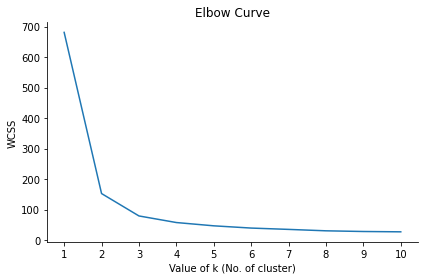

In [7]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Curve')
plt.xlabel('Value of k (No. of cluster)')
plt.ylabel('WCSS')
plt.tight_layout()
plt.xticks(range(1,11))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [19]:
print('No. of cluster in the actual dataset = {}'.format(len(set(dataset.target))))

No. of cluster in the actual dataset = 3


From the graph it we can see that the WCSS reduces significantly till k = 3 but after that the change is not significant and hence it the elbow point. Also when we checked with the actual set we get the number of clusters as 3
Therefore, k = 3 is the optimum number if cluster

### Computing K - Means for k = 3

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10)
predict = kmeans.fit_predict(X)

In [27]:
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

### Visualizing the clusters using petal length and width

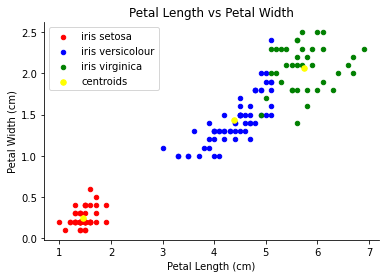

In [42]:
plt.figure()
plt.scatter(X[predict == 0,2],X[predict == 0,3],s = 20, c = 'red', label = 'iris setosa')
plt.scatter(X[predict == 1,2],X[predict == 1,3],s = 20, c = 'blue', label = 'iris versicolour')
plt.scatter(X[predict == 2,2],X[predict == 2,3],s = 20, c = 'green', label = 'iris virginica')

#plotting the centroid
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s = 30, c = 'yellow', label = 'centroids')

plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### Visualizing the clusters using sepal length and width

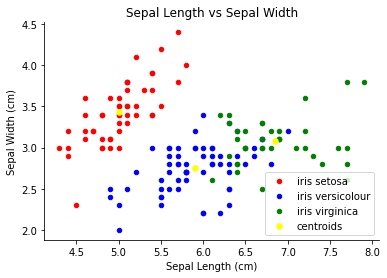

In [43]:
plt.figure()
plt.scatter(X[predict == 0,0],X[predict == 0,1],s = 20, c = 'red', label = 'iris setosa')
plt.scatter(X[predict == 1,0],X[predict == 1,1],s = 20, c = 'blue', label = 'iris versicolour')
plt.scatter(X[predict == 2,0],X[predict == 2,1],s = 20, c = 'green', label = 'iris virginica')

#plotting the centroid
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 30, c = 'yellow', label = 'centroids')

plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)